In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import s

In [8]:
df = pd.read_csv("data/dataset.csv")

In [9]:
# inserisci all'interno della colonna Media Costo alla Vendita la media delle colonne Costo Minimo alla Vendita e Costo Massimo alla Vendita
df["Media Costo alla Vendita"] = (df["Costo Minimo alla Vendita"] + df["Costo Massimo alla Vendita"]) / 2

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55033 entries, 0 to 55032
Data columns (total 93 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   id_istat                                                                                                        55033 non-null  int64  
 1   id_comune                                                                                                       55032 non-null  object 
 2   cap                                                                                                             55033 non-null  int64  
 3   Provincia                                                                                                       55033 non-null  object 
 4   Regione                                 

## Scatterplot per vedere la correlazione tra indice di occupazione e regione

Text(0.5, 1.0, 'Indice di occupazione per regione')

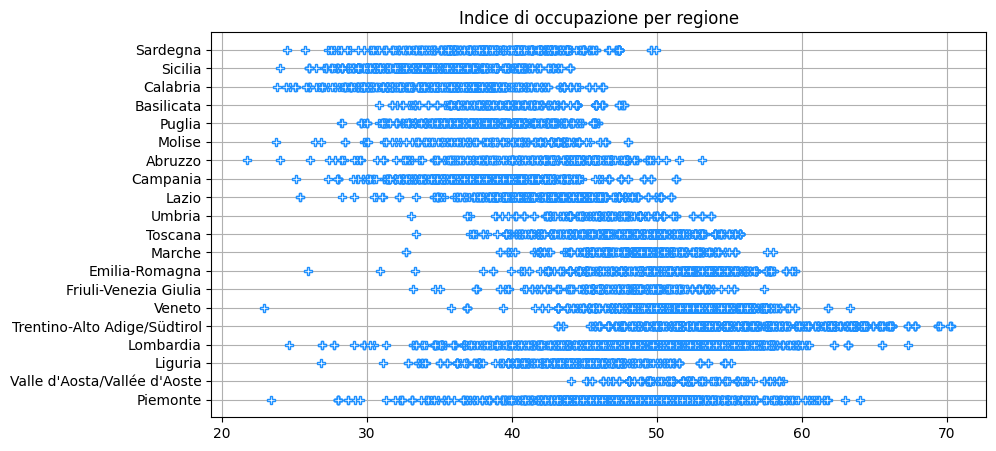

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['Indice di occupazione'],df['Regione'],'P', markeredgecolor = 'dodgerblue', color='w', alpha=1) # scatterplot
plt.grid()
plt.title('Indice di occupazione per regione')



## Correlazione tra alcune variabili economiche (quelle che erano numeriche di base)

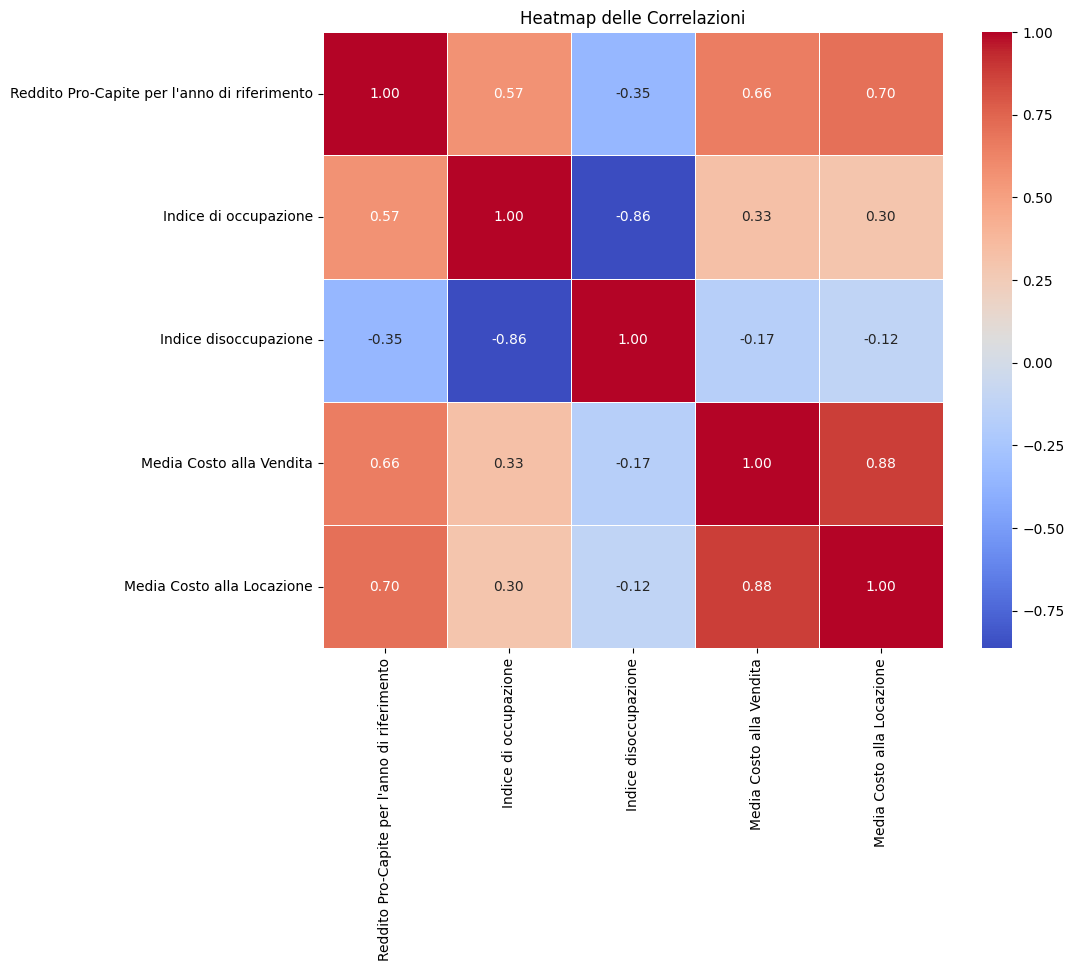

In [14]:
colonne_da_includere = ["Reddito Pro-Capite per l'anno di riferimento", "Indice di occupazione", "Indice disoccupazione", "Media Costo alla Vendita", "Media Costo alla Locazione"] 
corr_matrix = df[colonne_da_includere].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Heatmap delle Correlazioni")
plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder

# variabile dummy per i valori non numerici che volevamo analizzare

In [25]:
colonne_dummies = [col for col in df.columns if "Descrizione Tipologia di Immobile" in col]

# riprestinare una colonna eliminata con drop = 'first'  

In [28]:
df['Descrizione Tipologia di Immobile_Abitazioni civili'] = 1 - df[colonne_dummies].sum(axis=1)

In [29]:
df[colonne_dummies] = df[colonne_dummies].astype(int)


In [30]:
print(df.head())

   id_istat     id_comune    cap Provincia   Regione Ripartizione Geografica  \
0      1001         Agliè  10011    Torino  Piemonte              Nord-ovest   
1      1001         Agliè  10011    Torino  Piemonte              Nord-ovest   
2      1002       Airasca  10060    Torino  Piemonte              Nord-ovest   
3      1002       Airasca  10060    Torino  Piemonte              Nord-ovest   
4      1003  Ala di Stura  10070    Torino  Piemonte              Nord-ovest   

  id_catastale  Latitudine  Longitudine  Superficie in km2  ...  \
0         A074   45.363467     7.768606            13.2851  ...   
1         A074   45.363467     7.768606            13.2851  ...   
2         A109   44.917006     7.484504            15.7819  ...   
3         A109   44.917006     7.484504            15.7819  ...   
4         A117   45.314924     7.304367            45.7648  ...   

   Costo Massimo alla Locazione  Media Costo alla Locazione  \
0                           4.0                      

# matrice di correlazione per le tipologie di immobili e la media costo vendita e locazione

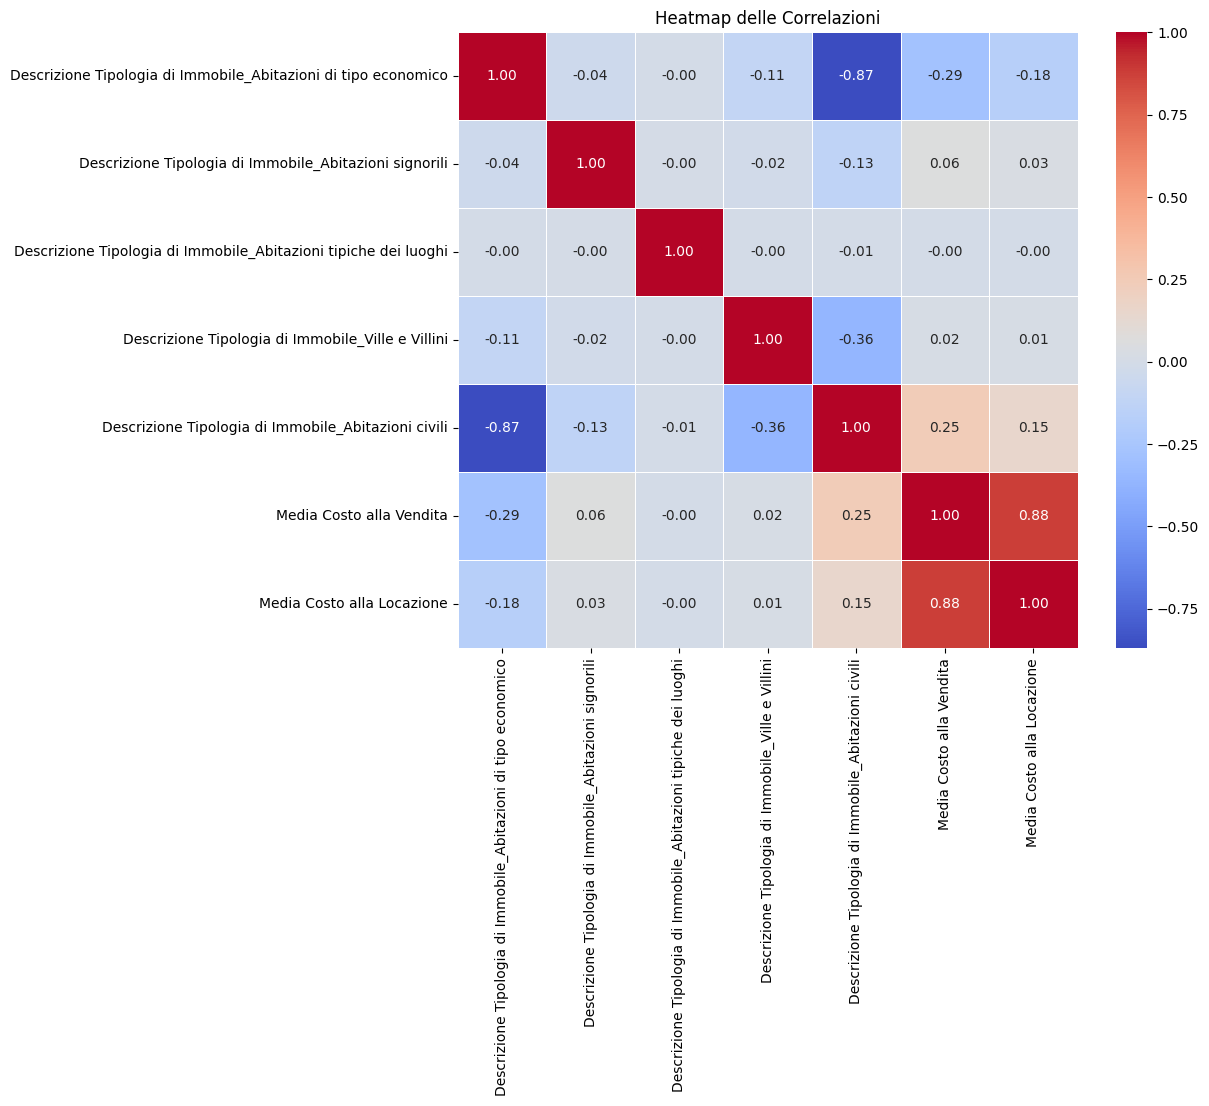

In [32]:
colonne_da_includere_2 = ["Descrizione Tipologia di Immobile_Abitazioni di tipo economico", "Descrizione Tipologia di Immobile_Abitazioni signorili", "Descrizione Tipologia di Immobile_Abitazioni tipiche dei luoghi", "Descrizione Tipologia di Immobile_Ville e Villini", "Descrizione Tipologia di Immobile_Abitazioni civili", "Media Costo alla Vendita", "Media Costo alla Locazione"] 
corr_matrix = df[colonne_da_includere_2].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Heatmap delle Correlazioni")
plt.show()